# Student Grades Analysis (Portuguese Class)

Dataset: student-por.csv

Below is the analysis of the student grades in a Portuguese class. The dataset has been divided into two datasets (train and test data) and Decision Tree classification is used for the analysis. 

Classification modeling process:
1: Data Load
2: Data Description
3: Data Exploration
4: Modeling (Decision Tree)
5: Model Performance Evaluation
6: Model Interpretation

## Step 1: Load The Data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

%matplotlib inline

In [2]:
# Choice of problem: classification. Read in our data (student-por.csv)
file_path = os.path.join(os.getcwd(), 'student', 'student-por.csv')
pd.options.display.max_columns = None
print(file_path)

student_data = pd.read_csv(file_path, sep=';')
student_data.head()

/Users/michaelkim/Documents/UCI DCE/Data Preparation, Modeling and Visualization with Python/Lecture 7/student/student-por.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
# Load the data into a pandas dataframe
file_path = os.path.join(os.getcwd(), 'student', 'student-mat-train.csv')
train_df = pd.read_csv(file_path)

train_dummies_df = pd.get_dummies(train_df, drop_first=True)


file_path = os.path.join(os.getcwd(), 'student', 'student-mat-test.csv')
test_df = pd.read_csv(file_path)

test_dummies_df = pd.get_dummies(test_df, drop_first=True)

## Step 2: Describe The Data

In [4]:
# Check if data types (Dtype) are all correct
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Separate our training data into predictors and predictand
xCols = [col for col in train_dummies_df.columns if col not in ['pass', 'G3']]
X_train = train_dummies_df[xCols]
y_train = train_dummies_df['pass']

X_test = test_dummies_df[xCols]
y_test = test_dummies_df['pass']

In [6]:
# Drop unnecessary columns ('G1' and 'G2')
student_data.drop(['G1', 'G2'], axis=1, inplace=True)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13


In [7]:
# Create a 'pass' column. If G3 is bigger or equal to 10, then it is pass. If not, fail. 
student_data['pass'] = 0
student_data.loc[student_data['G3'] >= 10, 'pass'] = 1
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13,1


In [8]:
# Split the data into training (80%) and testing data (20%)
train_df, test_df = train_test_split(student_data, test_size=0.20, random_state=14)

print(train_df.shape)
print(test_df.shape)

(519, 32)
(130, 32)


In [9]:
# Save our training and testing data
train_save_path = os.path.join(os.getcwd(), 'student', 'student-mat-train.csv')
train_df.to_csv(train_save_path, index=False)

test_save_path = os.path.join(os.getcwd(), 'student', 'student-mat-test.csv')
test_df.to_csv(test_save_path, index=False)

In [10]:
train_df['G3'].describe()

count    519.000000
mean      12.028902
std        3.125609
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [11]:
# Standardize our training and testing data for later use
X_train_standardized = ((X_train - X_train.mean()) / X_train.std())
X_test_standardized = ((X_test - X_train.mean()) / X_train.std())

## Step 3: Explore The Data

Text(0.5, 0, 'Final Grade Value')

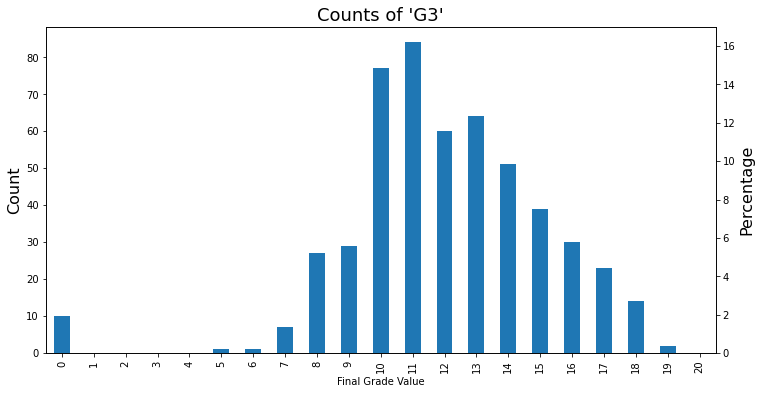

In [12]:
# Visualize G3 distribution
grade_counts = train_df['G3'].value_counts()

for g in range(0, 21):
    if g not in grade_counts.index:
        grade_counts.loc[g] = 0
    
grade_counts.sort_index(inplace=True)

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
grade_counts.plot(ax=ax1, kind='bar')

ax2 = ax1.twinx()
nrows = train_df['G3'].shape[0]
grade_count_prcts = grade_counts/nrows * 100
grade_count_prcts.plot(ax=ax2, kind='bar')

ax1.set_title("Counts of 'G3'", fontsize=18)
ax1.set_ylabel("Count", fontsize=16)
ax2.set_ylabel('Percentage', fontsize=16)
ax1.set_xlabel('Final Grade Value')

In [13]:
# There are some students with 0 score (outliers). Remove students with 0 and retrain the model
X_train_no0s = X_train.loc[train_dummies_df['G3'] > 0, :]
X_test_no0s = X_test.loc[test_dummies_df['G3'] > 0, :]

X_train_standardized_no0s = X_train_standardized.loc[train_dummies_df['G3'] > 0, :]
y_train_no0s = y_train.loc[train_dummies_df['G3'] > 0]

X_test_standardized_no0s = X_test_standardized.loc[test_dummies_df['G3'] > 0, :]
y_test_no0s = y_test.loc[test_dummies_df['G3'] > 0]

Text(0.5, 1.0, '85.55% Pass')

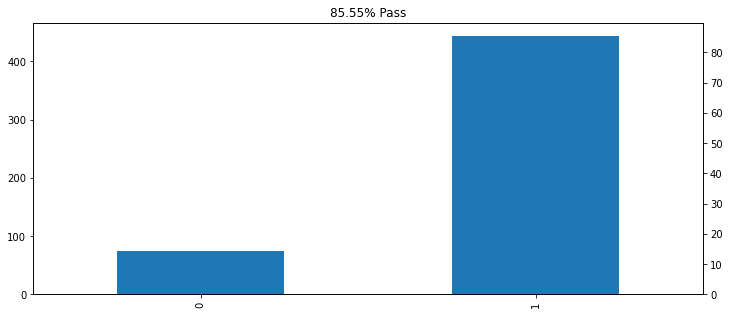

In [14]:
# Visualize the pass rate
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
train_df['pass'].value_counts().sort_index().plot(kind='bar', ax=ax1)
ax2 = ax1.twinx()
pass_fail_prct = (train_df['pass'].value_counts().sort_index()/nrows) * 100
pass_fail_prct.plot(kind='bar', ax=ax2)

ax1.set_title('{:.2f}% Pass'.format(pass_fail_prct[1]))

## Step 4: Build The Model

In [15]:
# Let's build a decision tree model
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Set hyper parameters with GridSearchCV
parameters = {'min_samples_leaf': range(5, 101)}
gsCV = GridSearchCV(clf, parameters, cv=5, return_train_score=True)

# Fit the model on the training data (no need to use standardized data for a decision tree model)
gsCV.fit(X=X_train_no0s, y=y_train_no0s)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': range(5, 101)},
             return_train_score=True)

In [16]:
# Let's build a logistic regression
logRegCVSDNo0s = LogisticRegressionCV(Cs=300, penalty='l1', cv=5, solver='liblinear', random_state=0)

# Fit the logistic regression model
logRegCVSDNo0s.fit(X_train_standardized_no0s, y_train_no0s)

LogisticRegressionCV(Cs=300, cv=5, penalty='l1', random_state=0,
                     solver='liblinear')

## Step 5: Evaluate The Model Performance

In [17]:
# Explore the result of the GridSearchCV training
grid_search_results = pd.DataFrame(gsCV.cv_results_)
grid_search_results.loc[grid_search_results['rank_test_score']<=10, :].sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,0.004443,0.000336,0.002686,0.000349,19,{'min_samples_leaf': 19},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
15,0.004369,0.000226,0.002691,0.000661,20,{'min_samples_leaf': 20},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
16,0.006836,0.000876,0.003734,0.000427,21,{'min_samples_leaf': 21},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
17,0.004798,0.000512,0.002573,0.000377,22,{'min_samples_leaf': 22},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
18,0.004123,0.000505,0.002493,0.000501,23,{'min_samples_leaf': 23},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
19,0.004362,0.000515,0.002441,0.000319,24,{'min_samples_leaf': 24},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
20,0.004296,0.000311,0.002641,0.000293,25,{'min_samples_leaf': 25},0.872549,0.882353,0.872549,0.872549,0.90099,0.880198,0.011068,1,0.889435,0.884521,0.886978,0.889435,0.882353,0.886544,0.002777
21,0.004341,0.000393,0.002325,0.000143,26,{'min_samples_leaf': 26},0.843137,0.901961,0.872549,0.872549,0.90099,0.878237,0.021805,8,0.877150,0.882064,0.886978,0.889435,0.882353,0.883596,0.004266
23,0.004031,0.000343,0.002147,0.000095,28,{'min_samples_leaf': 28},0.872549,0.872549,0.872549,0.872549,0.90099,0.878237,0.011376,8,0.872236,0.872236,0.872236,0.872236,0.882353,0.874259,0.004047
22,0.004113,0.000500,0.002283,0.000288,27,{'min_samples_leaf': 27},0.872549,0.852941,0.872549,0.872549,0.90099,0.874316,0.015348,10,0.872236,0.877150,0.886978,0.889435,0.882353,0.881630,0.006299


In [18]:
# Decision Tree
# Investigate the best model found
print(gsCV.best_params_)
bestTree = gsCV.best_estimator_

graphiv_string = export_graphviz(bestTree, out_file=None, filled=True, rounded=True,
                                 feature_names=X_train.columns)
graph = graphviz.Source(graphiv_string, format='png')

image_savepath = os.path.join(os.getcwd(), 'dt')
graph.render(image_savepath)

# Find the accuracy on the training and testing data of the decision tree
dt_accuracy_train = accuracy_score(bestTree.predict(X_train_no0s), y_train_no0s)
dt_accuracy_test = accuracy_score(bestTree.predict(X_test_no0s) , y_test_no0s)

print('The accuracy on the training data of a decision tree model is {:.0f}%'.format(dt_accuracy_train*100))
print('The accuracy on the testing data of a decision tree model is {:.0f}%'.format(dt_accuracy_test*100))

{'min_samples_leaf': 19}
The accuracy on the training data of a decision tree model is 89%
The accuracy on the testing data of a decision tree model is 82%


0.8821005629974762
[0.18374437]


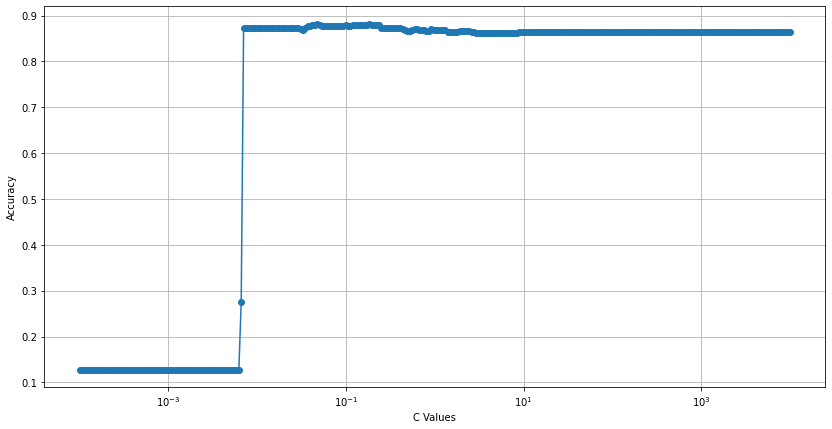

In [19]:
# Logistic regression
# Plot the CV accuracy with respect to C values
fig, axs = plt.subplots(1, 1, figsize=(14, 7))
axs.plot(logRegCVSDNo0s.Cs_, logRegCVSDNo0s.scores_[1].mean(axis=0), marker='o')
axs.set_xscale('log')
axs.set_title('')
axs.set_xlabel('C Values')
axs.set_ylabel('Accuracy')
axs.grid()
print(logRegCVSDNo0s.scores_[1].mean(axis=0).max())
print(logRegCVSDNo0s.C_)

In [20]:
# Find the accuracy for logistic regression
logRegSDAccuracyTrain = accuracy_score(logRegCVSDNo0s.predict(X_train_standardized_no0s), y_train_no0s)
logRegSDAccuracyTest = accuracy_score(logRegCVSDNo0s.predict(X_test_standardized_no0s), y_test_no0s)

print('The accuracy on the training data of a logistic regression model is {:.2f}%'.format(logRegSDAccuracyTrain*100))
print('The accuracy on the testing data of a logistic regression model is {:.2f}%'.format(logRegSDAccuracyTest*100))

The accuracy on the training data of a logistic regression model is 88.61%
The accuracy on the testing data of a logistic regression model is 84.80%


## Step 6: Describe And Interpret The Model

In [21]:
# Print the coefficients
print(logRegCVSDNo0s.coef_)

# Print out the columns that correspond to the non-zero coefficients
for coef, col in zip(logRegCVSDNo0s.coef_[0], X_train.columns):
    if coef != 0:
        print('{:.3f} * {}'.format(coef, col))

[[ 0.03623613  0.0763011   0.          0.          0.0548742  -0.52596221
   0.          0.          0.          0.          0.          0.
  -0.31852735 -0.65099479 -0.03372936  0.03135212  0.          0.
  -0.02432992  0.          0.          0.          0.          0.
   0.          0.          0.03392391  0.          0.08124483 -0.20611676
   0.          0.          0.         -0.15779678  0.05342483 -0.03253854
   0.34440436  0.         -0.01117438]]
0.036 * age
0.076 * Medu
0.055 * studytime
-0.526 * failures
-0.319 * absences
-0.651 * school_MS
-0.034 * sex_M
0.031 * address_U
-0.024 * Mjob_health
0.034 * reason_home
0.081 * reason_reputation
-0.206 * guardian_mother
-0.158 * paid_yes
0.053 * activities_yes
-0.033 * nursery_yes
0.344 * higher_yes
-0.011 * romantic_yes


So what do these models tell us about the data? When you look at the decision tree model visualization (dt.png), you can see that the top three nodes are: 'failures' (number of past class failures), 'higher_yes' (if a student wants to take higher education), and 'romantic_yes' (if a student is with a romantic relationship). These features are located on the top part of the tree model because they are the most important and useful attributes for best possible splits into homogeneous class. 

From logistic regression, coefficients determine whether a change in a predictor variable makes the event more likely or less likely. In this logistic regression model, the coefficients with the largest effect are 'school_MS', and again there are 'failures', and 'higher_yes'. We can see that the feature 'failures' and 'higher_yes' are the most important attributes to determine if a student is going to pass or fail the Portuguese class. 